## **Task 1: Data Collection and Preprocessing**
- **`Objective:`**
  - Scrape and preprocess Google Play Store reviews for three banks (1,200+ total reviews) to create a clean dataset for sentiment analysis.
  - 

In [4]:
# Import required files 
import os 
import sys

system_path = os.path.abspath('..')
if system_path not in sys.path:
    sys.path.append(system_path)

%load_ext autoreload
%autoreload 2

from scripts.data.scraping import scrape_play_store_reviews
from scripts.data.preprocess_review import merge_datasets, load_data, handling_missing_data, remove_duplicates, normalize_dates
from scripts.visualization import basic_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# CBE application review scrapping 
cbe_review = scrape_play_store_reviews("com.combanketh.mobilebanking")
print(f"Number of CBE Review: {cbe_review.shape[0]}")
cbe_review.to_csv("../data/raw/cbe_review.csv", index=False)

# Abyssinia Bank review scrapping 
abyssinia_review = scrape_play_store_reviews("com.boa.boaMobileBanking")
print(f"Number of Abyssinia Review: {abyssinia_review.shape[0]}")
abyssinia_review.to_csv("../data/raw/abyssinia_bank_review.csv", index=False)

# Dashen Bank review scrapping 
dashen_review = scrape_play_store_reviews("com.dashen.dashensuperapp")
print(f"Number of Dashen Review: {dashen_review.shape[0]}")
dashen_review.to_csv("../data/raw/dashen_bank_review.csv", index=False)

Number of CBE Review: 7499
Number of Abyssinia Review: 1045
Number of Dashen Review: 448


### loading raw mobile banking apps review 

In [14]:
# loading raw data's  
cbe_review_data = load_data('../data/raw/cbe_review.csv')
dashen_review_data = load_data('../data/raw/dashen_bank_review.csv')
abyssinia_review_data = load_data('../data/raw/abyssinia_bank_review.csv')

Data loaded successfully.
Data loaded successfully.
Data loaded successfully.


### Preprocessing the review datasets 

In [15]:
# merging datasets into one 
merged_review_data = merge_datasets(cbe_review_data, dashen_review_data, abyssinia_review_data)
merged_review_data

Datasets merged successfully.


,reviewId,review,rating,thumbsUpCount,review_date,app_name,app_version
0,dd9f9e37-177a-46df-b877-d0edaa9aed29,I cannot send to cbebirr app. through this app.,3,0,2025-06-05 11:12:49,Commercial Bank of Ethiopia,5.1.0
1,8e34703c-203c-4180-8b32-bfd0b3f0c871,good,4,0,2025-06-05 10:21:59,Commercial Bank of Ethiopia,5.1.0
2,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,not functional,1,0,2025-06-05 07:38:12,Commercial Bank of Ethiopia,5.1.0
3,f0dd744a-9409-4619-9800-7ea501571b09,everytime you uninstall the app you have to re...,1,0,2025-06-04 21:33:36,Commercial Bank of Ethiopia,5.1.0
4,3949d8e0-7ac4-4b43-b4f4-a45d6a888a85,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,0,2025-06-04 20:54:30,Commercial Bank of Ethiopia,5.1.0
...,...,...,...,...,...,...,...
1040,a7c5fb24-3dea-4f30-8a48-e5d537fa6f84,Perfect app,5,8,2024-01-12 11:10:38,BoA Mobile,25.05.03
1041,7bcc2bdb-87ee-4993-adc0-027963967a21,👍,3,3,2024-01-11 21:04:51,BoA Mobile,25.05.03
1042,c975592d-4176-48bd-a62e-a280b39ae58b,Absolutely it's fantastic apps this New apps i...,5,27,2024-01-11 20:49:53,BoA Mobile,25.05.03
1043,9cafe37d-532c-4b64-be35-3348307a5cc3,The best app next to Tele birr in ethiopia,5,48,2024-01-10 21:09:40,BoA Mobile,25.05.03


Description: number of reviews per bank

In [7]:
# Displaying number of reviews per apps 
merged_review_data['app_version'].value_counts()

app_version
5.1.0       7498
25.05.03    1044
1.0.16       448
Name: count, dtype: int64

e:\Courses\10 Academy\Week2\fintech-customer-experience-analytics\scripts\visualization\basic_plots.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_col, data=data, palette=palette, edgecolor='black')


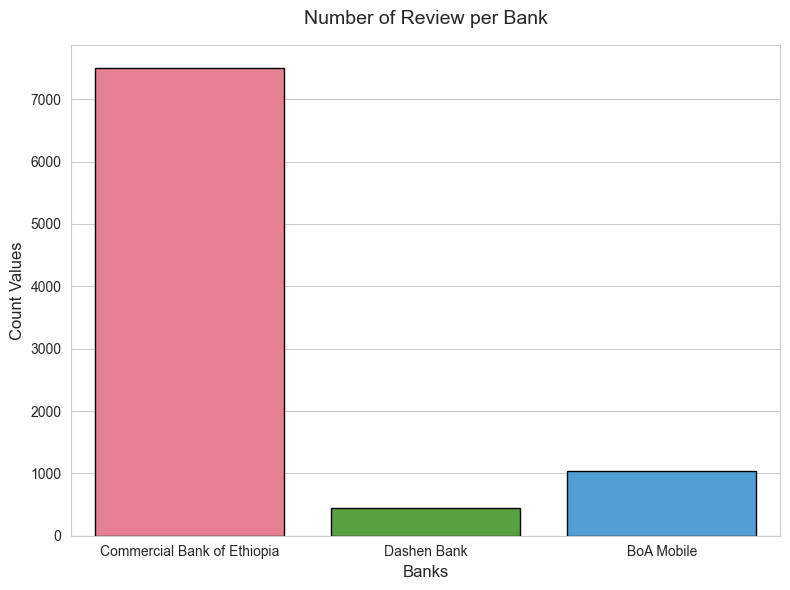

In [8]:
# visualize number of reviews per bank
basic_plots.count_plot(data=merged_review_data, x_col='app_name', title="Number of Review per Bank", xlabel="Banks")

- Checking and handling missing values of merged dataset 

In [16]:
# Handling missing values 
merged_review_data = handling_missing_data(merged_review_data)


Missing Values Report:
--------------------------------------------------
review    0.077847

No columns exceed 5.0% missing values.
Imputed missing values in 'review' (categorical) with mode: Good

All missing values handled successfully.


- Handling duplicated values in dataset 

In [17]:
# handling duplicate values 
merged_review_data = remove_duplicates(merged_review_data)

Number of Duplicated values: 0
Duplicates removed successfully.


- Normalizing dates into `YYYY-MM-DD` format

In [18]:
merged_review_data = normalize_dates(merged_review_data, 'review_date')


Dates in 'review_date' normalized to %Y-%m-%d format.


e:\Courses\10 Academy\Week2\fintech-customer-experience-analytics\scripts\data\preprocess_review.py:183: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[date_column] = pd.to_datetime(


In [19]:
merged_review_data

,reviewId,review,rating,thumbsUpCount,review_date,app_name,app_version
0,dd9f9e37-177a-46df-b877-d0edaa9aed29,I cannot send to cbebirr app. through this app.,3,0,2025-06-05,Commercial Bank of Ethiopia,5.1.0
1,8e34703c-203c-4180-8b32-bfd0b3f0c871,good,4,0,2025-06-05,Commercial Bank of Ethiopia,5.1.0
2,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,not functional,1,0,2025-06-05,Commercial Bank of Ethiopia,5.1.0
3,f0dd744a-9409-4619-9800-7ea501571b09,everytime you uninstall the app you have to re...,1,0,2025-06-04,Commercial Bank of Ethiopia,5.1.0
4,3949d8e0-7ac4-4b43-b4f4-a45d6a888a85,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,0,2025-06-04,Commercial Bank of Ethiopia,5.1.0
...,...,...,...,...,...,...,...
1040,a7c5fb24-3dea-4f30-8a48-e5d537fa6f84,Perfect app,5,8,2024-01-12,BoA Mobile,25.05.03
1041,7bcc2bdb-87ee-4993-adc0-027963967a21,👍,3,3,2024-01-11,BoA Mobile,25.05.03
1042,c975592d-4176-48bd-a62e-a280b39ae58b,Absolutely it's fantastic apps this New apps i...,5,27,2024-01-11,BoA Mobile,25.05.03
1043,9cafe37d-532c-4b64-be35-3348307a5cc3,The best app next to Tele birr in ethiopia,5,48,2024-01-10,BoA Mobile,25.05.03
